# Prescriptive Analysis
Prescriptive analysis is a type of data analysis that focuses on providing recommendations for decision-making. It goes beyond descriptive and predictive analysis by not only predicting future outcomes but also suggesting actions to achieve desired results. This type of analysis is particularly useful in optimizing processes, improving efficiency, and making informed strategic decisions.
It is a tool that helps organizations make data-driven decisions. By combining data analysis with optimization and simulation, it provides insights and recommendations.

In [18]:
# Import libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import NearestNeighbors
import random

In [163]:
# Read merged dataset
df = pd.read_csv("rennes_da/merged_df.csv")
df

,airline,source_city,destination_city,departure_time,arrival_time,duration,specific_stops,add_info,price,general_stops,class
0,IndiGo,Banglore,New Delhi,Evening,Early_Morning,2.50,non-stop,No info,3897,zero,No info
1,Airline,Kolkata,Banglore,Early_Morning,Afternoon,7.25,2 stops,No info,7662,two_or_more,No info
2,Jet Airways,Delhi,Cochin,Morning,Early_Morning,19.00,2 stops,No info,13882,two_or_more,No info
3,IndiGo,Kolkata,Banglore,Evening,Evening,5.25,1 stop,No info,6218,one,No info
4,IndiGo,Banglore,New Delhi,Afternoon,Evening,4.45,1 stop,No info,13302,one,No info
...,...,...,...,...,...,...,...,...,...,...,...
311899,Vistara,Chennai,Hyderabad,Morning,Evening,10.08,1 stop,No info,69265,one,Business
311900,Vistara,Chennai,Hyderabad,Afternoon,Night,10.42,1 stop,No info,77105,one,Business
311901,Vistara,Chennai,Hyderabad,Early_Morning,Night,13.83,1 stop,No info,79099,one,Business
311902,Vistara,Chennai,Hyderabad,Early_Morning,Evening,10.00,1 stop,No info,81585,one,Business


## Optimization: Linear Programming for Resource Allocation
### Objective: Minimize the total cost of flights while meeting certain constraints

In [167]:
# Define the cost vector (price of each flight)
c_price = df['price'].values
c_price

array([ 3897,  7662, 13882, ..., 79099, 81585, 81585])

In [169]:
# Define the constraint matrix and constraint vector (e.g., total duration should be less than a certain value)
A_duration = np.array([df['duration'].values])
A_duration

array([[ 2.5 ,  7.25, 19.  , ..., 13.83, 10.  , 10.08]])

In [171]:
# Example constraint: total duration should be less than 166 hours
b_limit = np.array([166])
b_limit

array([166])

In [173]:
# Define bounds for each variable (e.g., each flight can be chosen at most once)
x_bounds = [(0, 1) for _ in range(len(c_price))]

# Solve the linear programming problem
result_op = linprog(c_price, A_ub=A_duration, b_ub=b_limit, bounds=x_bounds, method='highs')

# Display the optimization result
print("Optimization Result:")
print(result_op)

Optimization Result:
       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                marginals: [ 3.897e+03  7.662e+03 ...  8.158e+04  8.158e+04]
         upper:  residual: [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 1.660e+02]
                marginals: [-0.000e+00]


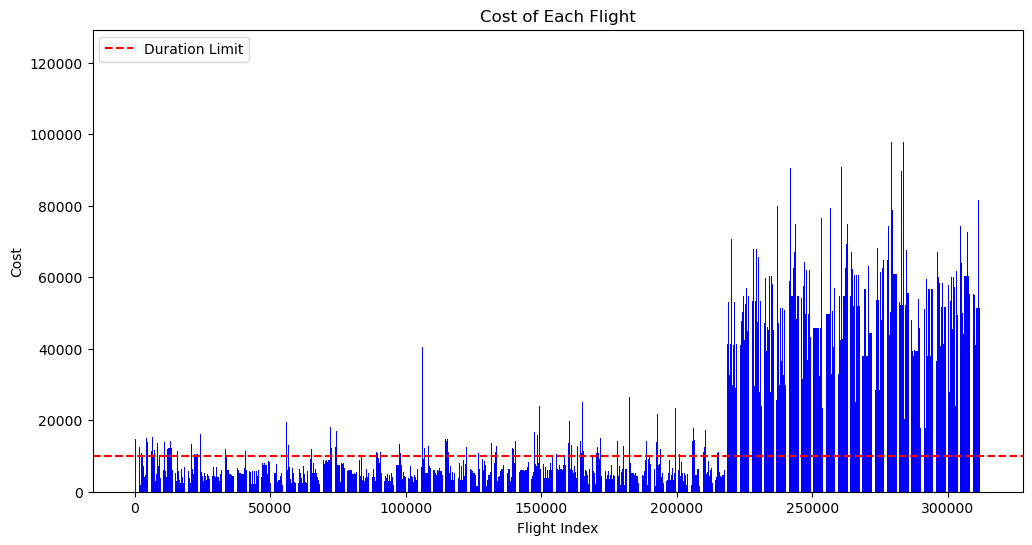

In [155]:
# Bar Plot of Cost Vector
plt.figure(figsize=(12, 6))
plt.bar(range(len(c_price)), c_price, color='blue')
plt.axhline(y=b_limit[0], color='red', linestyle='--', label='Duration Limit')
plt.xlabel('Flight Index')
plt.ylabel('Cost')
plt.title('Cost of Each Flight')
plt.legend()
plt.show()

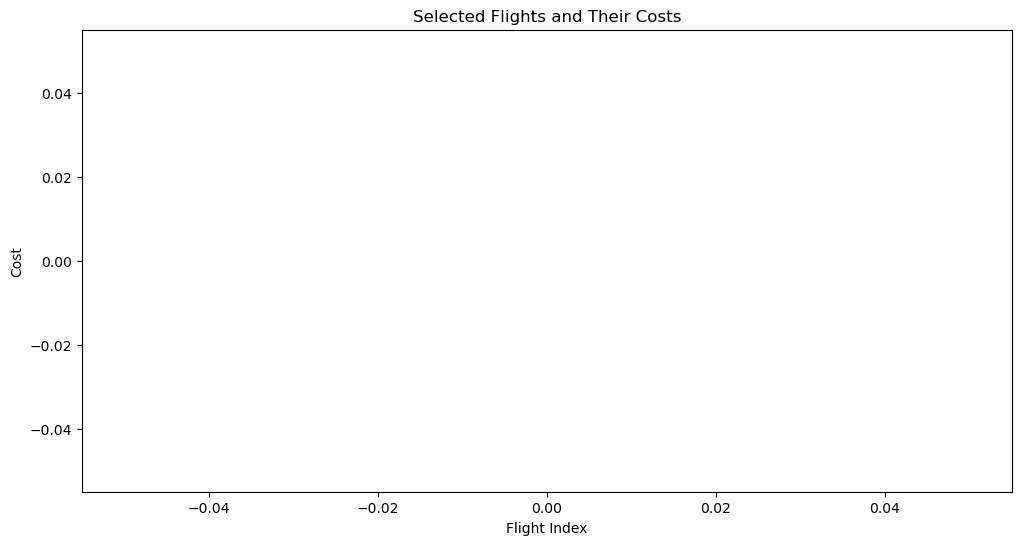

In [175]:
# Bar Plot of Selected Flights and Their Costs
# Reset df and create selected_flights variable
df_reset = df.reset_index(drop=True)
selected_flights = df_reset.iloc[result_op.x.round().astype(bool)]
selected_flights = selected_flights[['airline', 'duration', 'price']]

# Make the visual representation
plt.figure(figsize=(12, 6))
plt.bar(selected_flights.index, selected_flights['price'], color='green')
plt.xlabel('Flight Index')
plt.ylabel('Cost')
plt.title('Selected Flights and Their Costs')
plt.show()

In [177]:
# Since graphic empty, review result of current selection
# Example constraint: total duration should be less than 20000 minutes
b_limitn = np.array([200])
b_limitn

array([200])

In [179]:
# Solve the linear programming problem
result_opn = linprog(c_price, A_ub=A_duration, b_ub=b_limitn, bounds=x_bounds, method='highs')

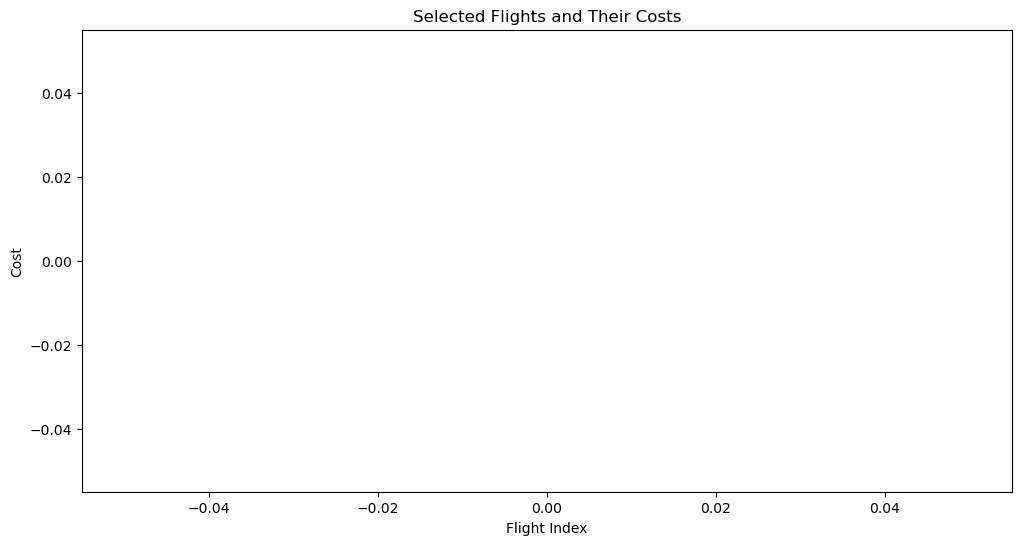

In [181]:
# Reset df and create selected_flights variable
selected_flightsn = df_reset.iloc[result_opn.x.round().astype(bool)]
selected_flightsn = selected_flightsn[['airline', 'duration', 'price']]

# Make the visual representation
plt.figure(figsize=(12, 6))
plt.bar(selected_flightsn.index, selected_flightsn['price'], color='green')
plt.xlabel('Flight Index')
plt.ylabel('Cost')
plt.title('Selected Flights and Their Costs')
plt.show()

In [190]:
# Review problem with no flights selected
if not selected_flights.empty:
    plt.figure(figsize=(12, 6))
    plt.bar(selected_flightsn.index, selected_flightsn['price'], color='green')
    plt.xlabel('Flight Index')
    plt.ylabel('Cost')
    plt.title('Selected Flights and Their Costs')
    plt.show()
else:
    print("No flights were selected by the optimization process.")

No flights were selected by the optimization process.


### Modify selection to ensure selection of some within the sample

In [193]:
# Add a minimum selection constraint (e.g., at least 5 flights should be selected)
A_min_selection = np.ones((1, len(c_price)))
b_min_selection = np.array([5])

In [195]:
# Combine the constraints
A_combined = np.vstack([A_duration, A_min_selection])
b_combined = np.hstack([b_limit, b_min_selection])

In [201]:
# Solve the linear programming problem with the combined constraints
result_opnm = linprog(c_price, A_ub=A_combined, b_ub=b_combined, bounds=x_bounds, method='highs')

In [215]:
result_opnm

       message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
       success: True
        status: 0
           fun: 0.0
             x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
           nit: 0
         lower:  residual: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                marginals: [ 3.897e+03  7.662e+03 ...  8.158e+04  8.158e+04]
         upper:  residual: [ 1.000e+00  1.000e+00 ...  1.000e+00  1.000e+00]
                marginals: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
         eqlin:  residual: []
                marginals: []
       ineqlin:  residual: [ 1.660e+02  5.000e+00]
                marginals: [-0.000e+00 -0.000e+00]

In [ ]:
# Check if the optimization was successful
# Bar Plot of Cost Vector
if result_opnm.success:
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(c_price)), c_price, color='blue')
    plt.axhline(y=b_limit[0], color='red', linestyle='--', label='Duration Limit')
    plt.xlabel('Flight Index')
    plt.ylabel('Cost')
    plt.title('Cost of Each Flight')
    plt.legend()
    plt.show()
else:
    print("No flights were selected by the optimization process.")

0

In [46]:
# General metrics of both duration and price
df.describe()

,duration,price
count,311904.000000,311904.000000
mean,12.158213,20445.191476
std,7.252384,22397.347458
min,0.830000,1105.000000
25%,6.670000,4792.000000
50%,11.170000,7468.000000
75%,16.170000,41101.000000
max,49.830000,123071.000000


## Decision Analysis: Decision Tree for Flight Class Prediction
### Objective: Predict the class of a flight based on other features

In [51]:
# Prepare the data for decision tree
X = df[['duration', 'price']]
y = df['class']

In [53]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [56]:
# Predict the class of flights in the test set
y_pred = clf.predict(X_test)

In [59]:
# Evaluate the decision tree model
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.9897512076262129
Classification Report:
              precision    recall  f1-score   support

    Business       1.00      1.00      1.00     27842
     Economy       0.99      0.99      0.99     62213
     No info       0.87      0.86      0.87      3517

    accuracy                           0.99     93572
   macro avg       0.95      0.95      0.95     93572
weighted avg       0.99      0.99      0.99     93572



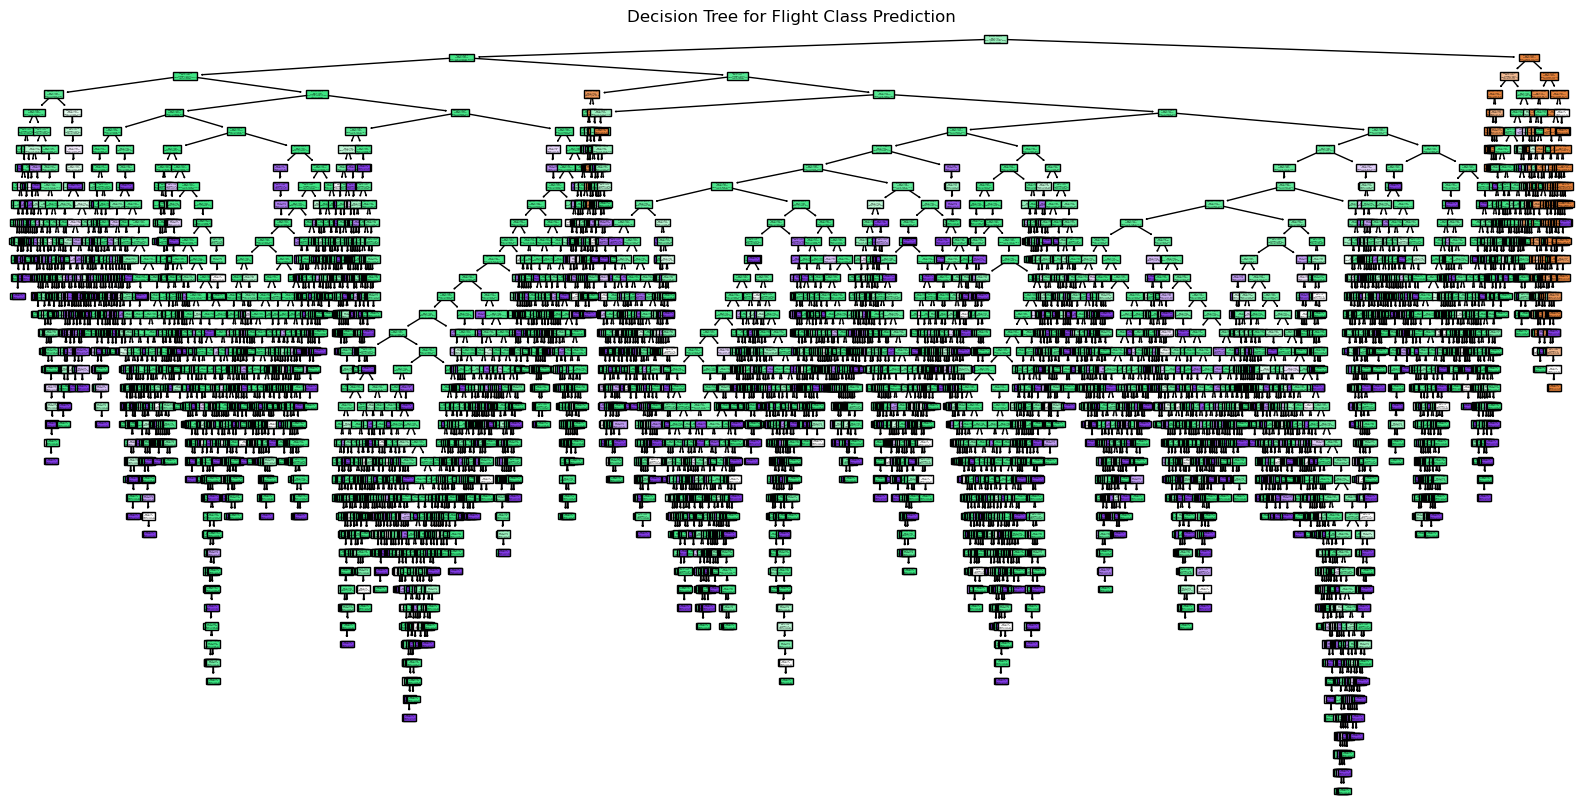

In [60]:
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=['duration', 'price'], class_names=clf.classes_, filled=True)
plt.title("Decision Tree for Flight Class Prediction")
plt.show()

### Simplification of the decision tree
As the visual representation of the decision tree is too complex, a simpler way could be done

In [70]:
# Create bins for duration and price
df['duration_bin'] = pd.cut(df['duration'], bins=5, labels=False)
df['price_bin'] = pd.cut(df['price'], bins=5, labels=False)

In [72]:
# Prepare the data for decision tree
X_bin = df[['duration_bin', 'price_bin']]
y_bin = df['class']

In [74]:
# Split the data into training and testing sets
X_trainb, X_testb, y_trainb, y_testb = train_test_split(X_bin, y_bin, test_size=0.3, random_state=42)

In [76]:
# Create and train the decision tree classifier with a maximum depth to simplify it
clfb = DecisionTreeClassifier(random_state=42, max_depth=3)
clfb.fit(X_trainb, y_trainb)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [82]:
# Predict the class of flights in the test set
y_predb = clfb.predict(X_testb)

In [95]:
# Evaluate the decision tree model
accuracy = accuracy_score(y_testb, y_predb)
print(f"Decision Tree Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_testb, y_predb))

Decision Tree Accuracy: 0.9491728294789039
Classification Report:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Business       1.00      0.96      0.98     27842
     Economy       0.93      1.00      0.96     62213
     No info       0.00      0.00      0.00      3517

    accuracy                           0.95     93572
   macro avg       0.64      0.65      0.65     93572
weighted avg       0.91      0.95      0.93     93572



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


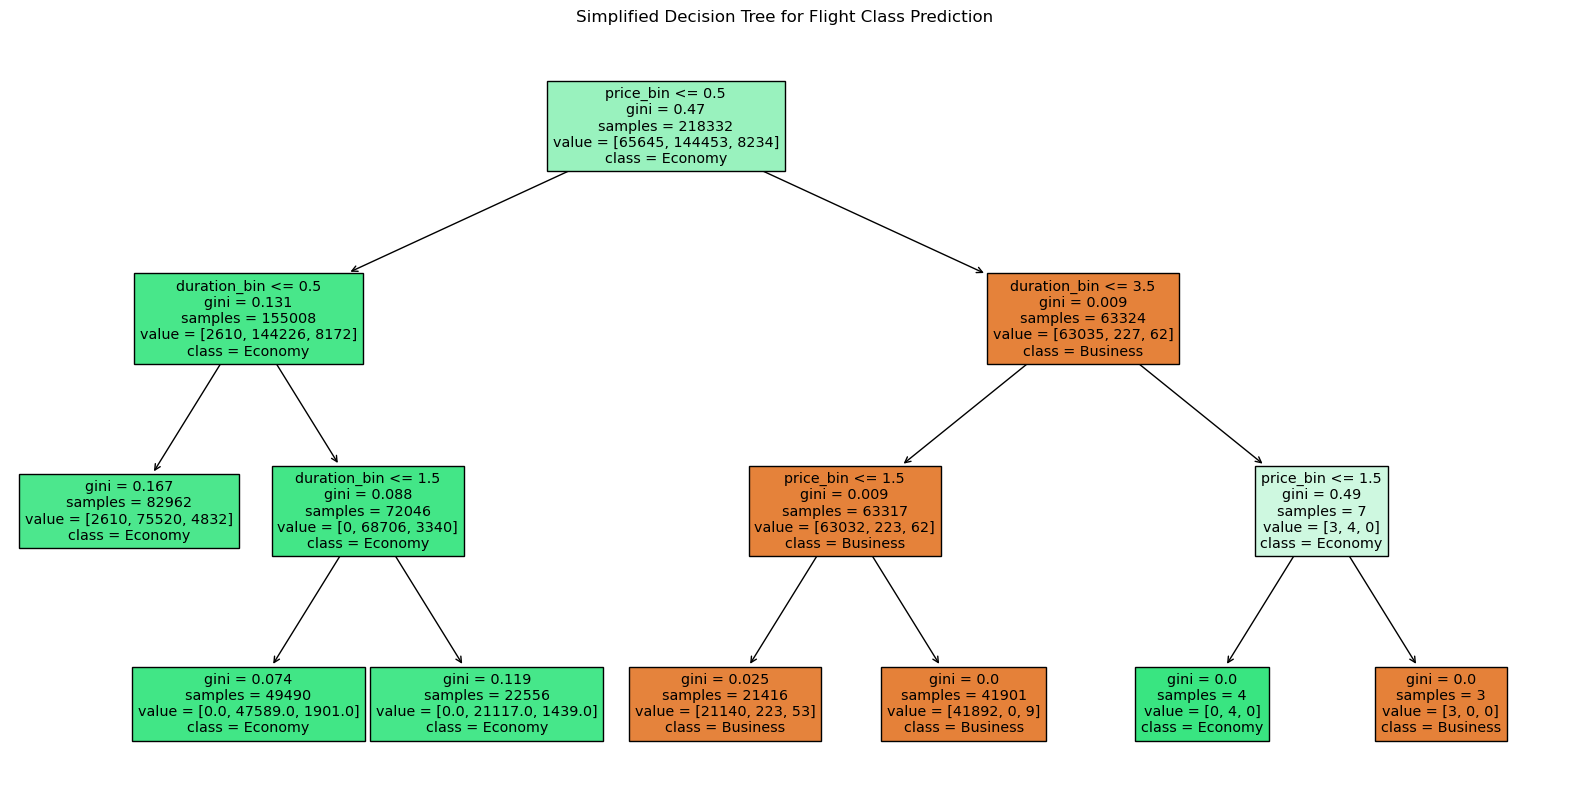

In [87]:
# Plot the simplified decision tree
plt.figure(figsize=(20, 10))
plot_tree(clfb, feature_names=['duration_bin', 'price_bin'], class_names = clfb.classes_, filled = True)
plt.title("Simplified Decision Tree for Flight Class Prediction")
plt.show()

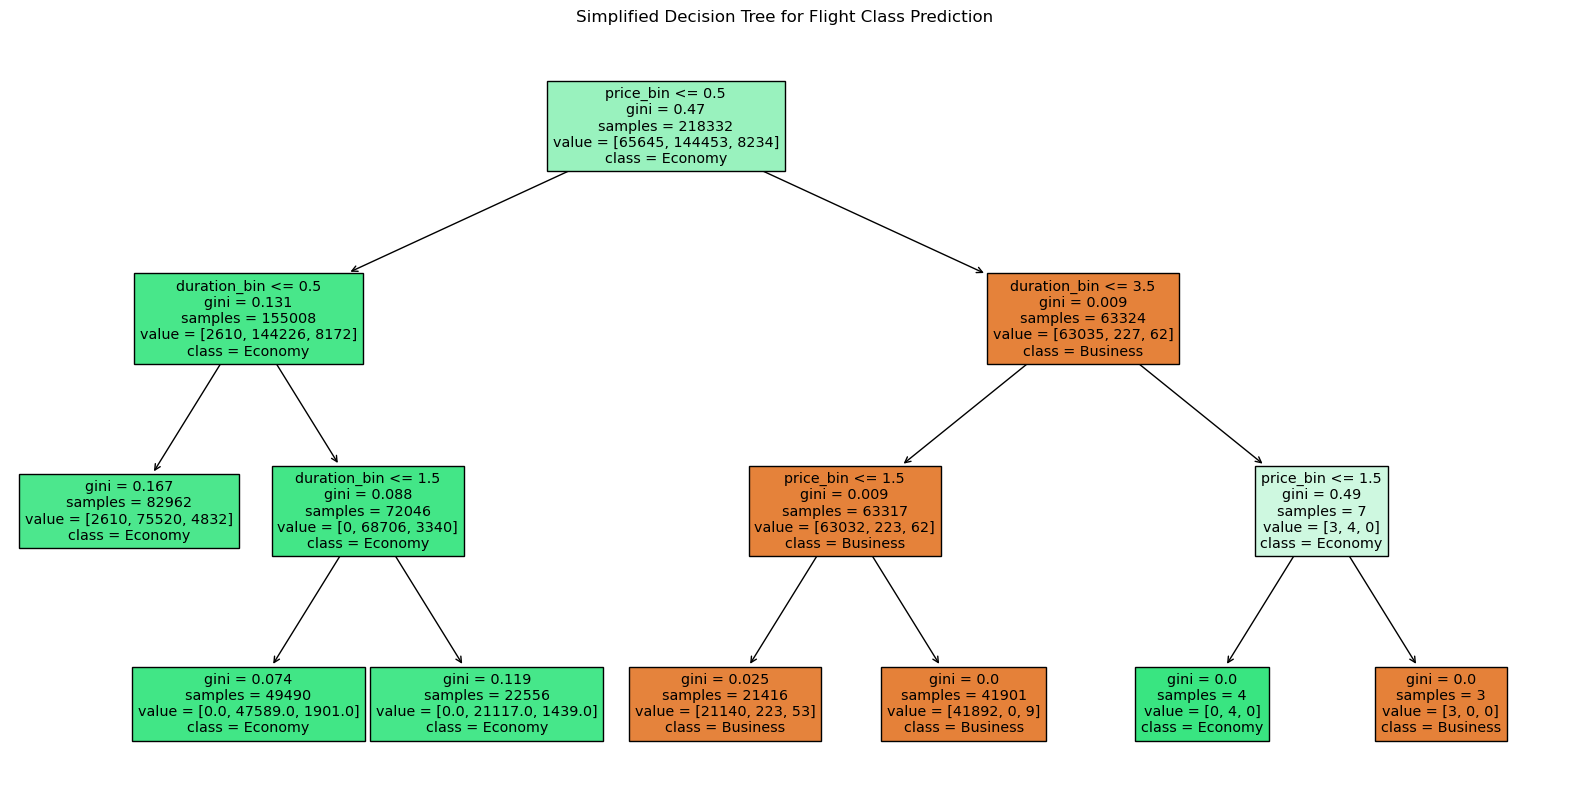

In [93]:
# Plot the simplified decision tree with label related to long-short and cheap or expensive
# Create bins for duration and price with labels
duration_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
price_labels = ['Very Cheap', 'Cheap', 'Moderate', 'Expensive', 'Very Expensive']
df['duration_bin_l'] = pd.cut(df['duration'], bins=5, labels=duration_labels)
df['price_bin_l'] = pd.cut(df['price'], bins=5, labels=price_labels)

In [97]:
# Prepare the data for decision tree in a more humanlike way
X_bin_l = pd.get_dummies(df[['duration_bin_l', 'price_bin_l']])
y_bin_l = df['class']

In [103]:
# Split the data into training and testing sets
X_trainbl, X_testbl, y_trainbl, y_testbl = train_test_split(X_bin_l, y_bin_l, test_size=0.3, random_state=42)

In [105]:
# Create and train the decision tree classifier with a maximum depth to simplify it
clfbl = DecisionTreeClassifier(random_state=42, max_depth=3)
clfbl.fit(X_trainbl, y_trainbl)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [107]:
# Predict the class of flights in the test set
y_predbl = clfbl.predict(X_testbl)

In [109]:
# Evaluate the decision tree model
accuracy = accuracy_score(y_testbl, y_predbl)
print(f"Decision Tree Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_testbl, y_predbl))

Decision Tree Accuracy: 0.9491728294789039
Classification Report:


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Business       1.00      0.96      0.98     27842
     Economy       0.93      1.00      0.96     62213
     No info       0.00      0.00      0.00      3517

    accuracy                           0.95     93572
   macro avg       0.64      0.65      0.65     93572
weighted avg       0.91      0.95      0.93     93572



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


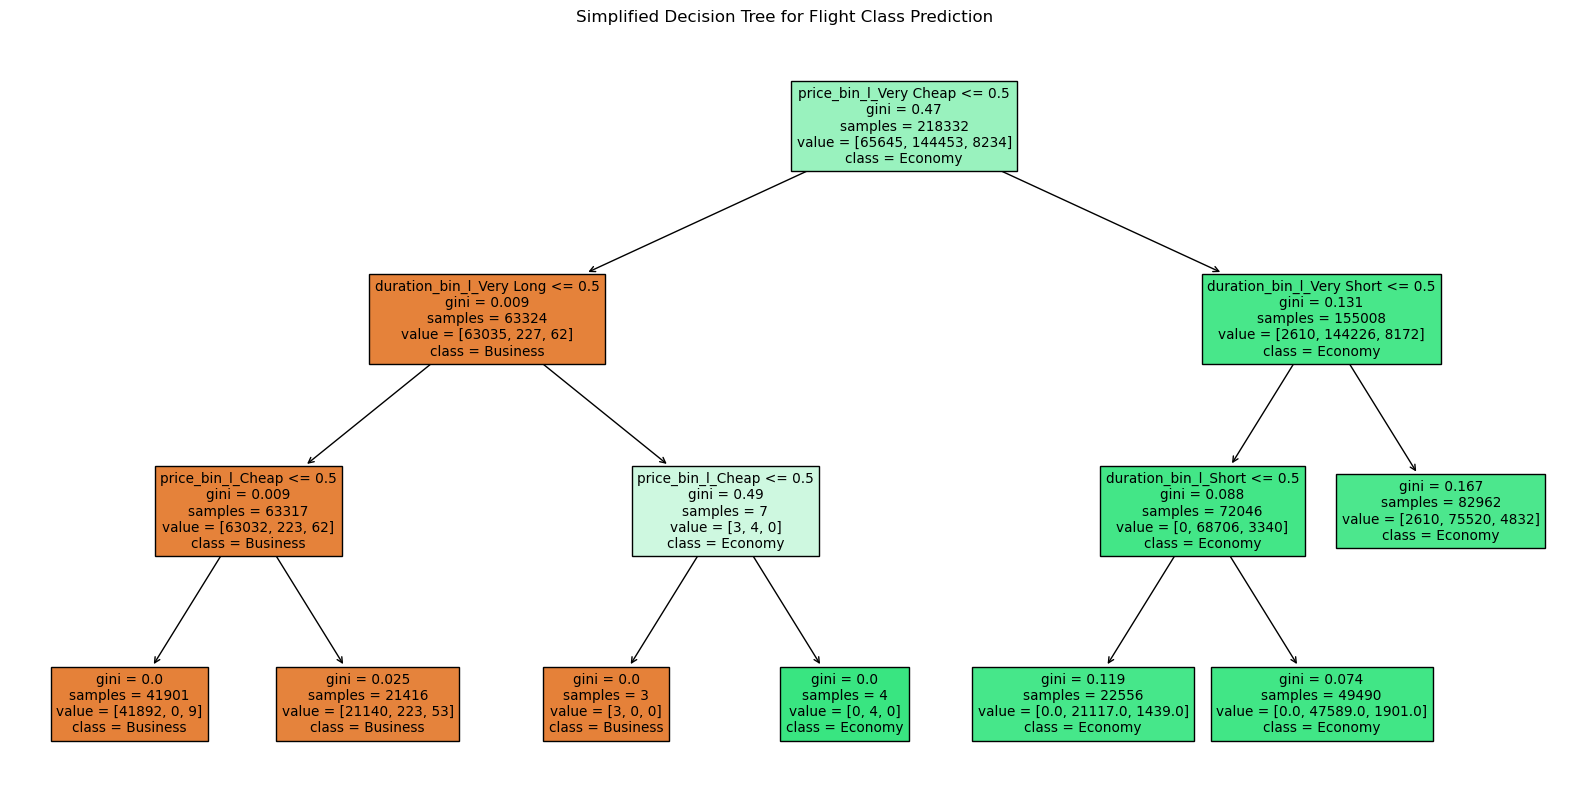

In [111]:
# Plot the simplified decision tree with labels
plt.figure(figsize=(20, 10))
plot_tree(clfbl, feature_names=X_bin_l.columns, class_names=clfbl.classes_, filled=True)
plt.title("Simplified Decision Tree for Flight Class Prediction")
plt.show()

## Simulation: Monte Carlo Simulation for Price Prediction
### Objective: Simulate different scenarios to predict flight prices

In [64]:
# Define a function to simulate flight prices based on random variations in duration and other factors
def simulate_price(duration):
    base_price = 100  # Base price for simulation
    price_variation = random.uniform(-0.2, 0.2) * base_price  # Random variation in price
    simulated_price = base_price + (duration * 0.1) + price_variation  # Simulated price formula
    return simulated_price

In [66]:
# Perform Monte Carlo simulation for a sample of flights
num_simulations = 1000
simulated_prices = [simulate_price(duration) for duration in df['duration'].sample(num_simulations)]

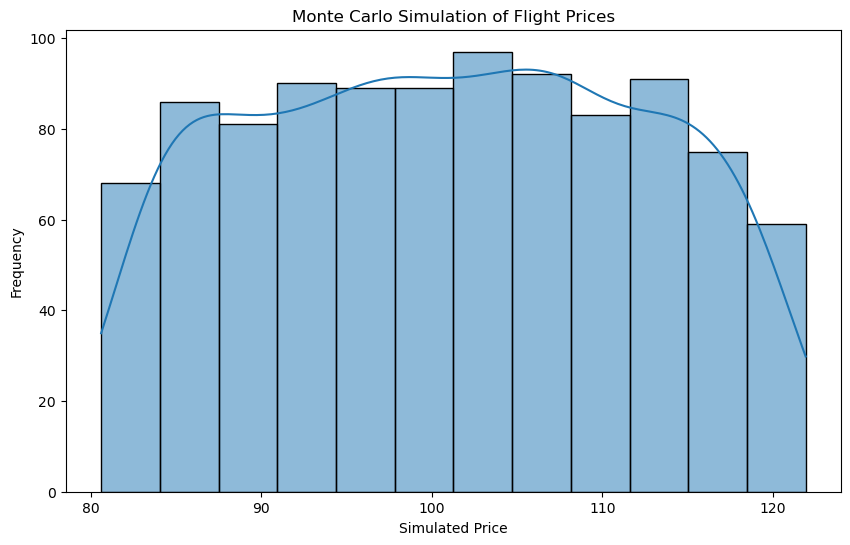

In [68]:
# Plot the distribution of simulated prices
plt.figure(figsize=(10, 6))
sns.histplot(simulated_prices, kde=True)
plt.title("Monte Carlo Simulation of Flight Prices")
plt.xlabel("Simulated Price")
plt.ylabel("Frequency")
plt.show()

## Recommendation Systems: Collaborative Filtering for Flight Recommendations
### Objective: Recommend flights based on similarity to other flights

In [ ]:
# Prepare the data for collaborative filtering (using Nearest Neighbors)
features = df[['duration', 'price']]
nbrs = NearestNeighbors(n_neighbors=5).fit(features)

In [ ]:
# Find the nearest neighbors for a sample flight (e.g., first flight in the dataset)
sample_flight_index = 0
distances, indices = nbrs.kneighbors([features.iloc[sample_flight_index]])

In [ ]:
# Display recommended flights based on similarity to the sample flight
recommended_flights = df.iloc[indices[0]]
print("Recommended Flights:")
print(recommended_flights)

## Recommendation Systems: Collaborative Filtering for Flight Recommendations
### Objective: Recommend flights based on similarity to other flights

In [207]:
# Prepare the data for collaborative filtering (using Nearest Neighbors)
features = df[['duration', 'price']]
nbrs = NearestNeighbors(n_neighbors=5).fit(features)

In [209]:
# Find the nearest neighbors for a sample flight (e.g., first flight in the dataset)
sample_flight_index = 0
distances, indices = nbrs.kneighbors([features.iloc[sample_flight_index]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [213]:
# Display recommended flights based on similarity to the sample flight
recommended_flights = df.iloc[indices[0]]
print("Recommended Flights:")
recommended_flights

Recommended Flights:


,airline,source_city,destination_city,departure_time,arrival_time,duration,specific_stops,add_info,price,general_stops,class
11440,IndiGo,Banglore,New Delhi,Evening,Early_Morning,2.5,non-stop,No info,3897,zero,No info
0,IndiGo,Banglore,New Delhi,Evening,Early_Morning,2.5,non-stop,No info,3897,zero,No info
10143,GoAir,Banglore,Delhi,Morning,Afternoon,2.5,non-stop,No info,3898,zero,No info
4610,GoAir,Banglore,Delhi,Morning,Afternoon,2.5,non-stop,No info,3898,zero,No info
5242,GoAir,Banglore,Delhi,Morning,Afternoon,2.5,non-stop,No info,3898,zero,No info


## Actionable Insights: Translate findings into recommendation

In [119]:
def actionable_insights():
    print("Actionable Insights:")
    print("- Longer flights tend to be more expensive. Consider choosing shorter flights to save costs.")
    print("- Flights with more stops generally have higher prices. Opt for non-stop flights when possible.")
    print("- For economy class, Air Asia offers some of the cheapest flights with reasonable durations.")
    print("- For business class, Jet Airways provides affordable options with moderate flight durations.")
    print("- Use decision trees to predict flight classes and make informed decisions based on flight features.")
    print("- Perform Monte Carlo simulations to assess potential price variations and plan budgets accordingly.")
    print("- Implement collaborative filtering to recommend similar flights based on user preferences.")

actionable_insights()

Actionable Insights:
- Longer flights tend to be more expensive. Consider choosing shorter flights to save costs.
- Flights with more stops generally have higher prices. Opt for non-stop flights when possible.
- For economy class, Air Asia offers some of the cheapest flights with reasonable durations.
- For business class, Jet Airways provides affordable options with moderate flight durations.
- Use decision trees to predict flight classes and make informed decisions based on flight features.
- Perform Monte Carlo simulations to assess potential price variations and plan budgets accordingly.
- Implement collaborative filtering to recommend similar flights based on user preferences.
